<a href="https://colab.research.google.com/github/KevOdhiambo/Customer-Analysis/blob/main/Blog_Analytics_Findings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Understanding The Context
An entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. 

In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads. 

## 2.Specifying the Analysis question
Identify which characteritics sets out the individuals who click on Ads on the Cryptography course blog.

## 3. Metrics of Success
I'm able to clearly identify which individuals are most likely to click on ads using the provided data.

## 4. Recording the Experiment Design 
1. Data loading and overview
2. Data Cleaning
3. Univariate analysis
4. Bivariate analysis
5. Summary of findings



In [1]:
%load_ext rpy2.ipython

In [44]:
## a.Install Packages
%%R
install.packages('tidyverse')
install.packages('data.table')
install.packages('ggplot2')
install.packages('lattice')
install.packages('RColorBrewer')
install.packages('ggcorrplot')
install.packages('readr')
install.packages('lubridate')
install.packages('caret')
install.packages('mlbench')



(as ‘lib’ is unspecified)







	‘/tmp/RtmpUQjUJz/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUQjUJz/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUQjUJz/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUQjUJz/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUQjUJz/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUQjUJz/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUQjUJz/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUQjUJz/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUQjUJz/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUQjUJz/downloaded_packages’



In [45]:
 %%R
 #Loading Libraries
library(tidyverse)
library(data.table)
library(ggplot2)
library(lattice)
library(RColorBrewer)
library(ggcorrplot)
library(readr)
library(lubridate)
library(caret)
library(mlbench)

In [4]:
## Data Loading and Overview
%%R
#import my data set
ads <- read.csv("CustomerAds.csv", header=TRUE, sep =",")


In [8]:
##Data Viewing
%%R
#view first entries in the dataset
head(ads)

  Daily.Time.Spent.on.Site Age Area.Income Daily.Internet.Usage
1                    68.95  35    61833.90               256.09
2                    80.23  31    68441.85               193.77
3                    69.47  26    59785.94               236.50
4                    74.15  29    54806.18               245.89
5                    68.37  35    73889.99               225.58
6                    59.99  23    59761.56               226.74
                          Ad.Topic.Line           City Male    Country
1    Cloned 5thgeneration orchestration    Wrightburgh    0    Tunisia
2    Monitored national standardization      West Jodi    1      Nauru
3      Organic bottom-line service-desk       Davidton    0 San Marino
4 Triple-buffered reciprocal time-frame West Terrifurt    1      Italy
5         Robust logistical utilization   South Manuel    0    Iceland
6       Sharable client-driven software      Jamieberg    1     Norway
            Timestamp Clicked.on.Ad
1 2016-03-27 00:53:

In [9]:
%%R
#view the last entries in the dataset
tail(ads)

     Daily.Time.Spent.on.Site Age Area.Income Daily.Internet.Usage
995                     43.70  28    63126.96               173.01
996                     72.97  30    71384.57               208.58
997                     51.30  45    67782.17               134.42
998                     51.63  51    42415.72               120.37
999                     55.55  19    41920.79               187.95
1000                    45.01  26    29875.80               178.35
                            Ad.Topic.Line          City Male
995         Front-line bifurcated ability  Nicholasland    0
996         Fundamental modular algorithm     Duffystad    1
997       Grass-roots cohesive monitoring   New Darlene    1
998          Expanded intangible solution South Jessica    1
999  Proactive bandwidth-monitored policy   West Steven    0
1000      Virtual 5thgeneration emulation   Ronniemouth    0
                    Country           Timestamp Clicked.on.Ad
995                 Mayotte 2016-04-04 03:

In [10]:
%%R
#check number of rows and columns
print(dim(ads)) 
#there are 1000 rows and 10 column in our dataset

[1] 1000   10


In [11]:
%%R
#check the data set statistical summary
summary(ads)

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 Ad.Topic.Line          City                Male         Country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   

In [12]:
%%R
#check the column datatypes in the data set
sapply(ads, class)

Daily.Time.Spent.on.Site                      Age              Area.Income 
               "numeric"                "integer"                "numeric" 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
               "numeric"              "character"              "character" 
                    Male                  Country                Timestamp 
               "integer"              "character"              "character" 
           Clicked.on.Ad 
               "integer" 


In [13]:
%%R
#check for missing values in our data set
colSums(is.na(ads))
#there are no missing values in the data set

Daily.Time.Spent.on.Site                      Age              Area.Income 
                       0                        0                        0 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked.on.Ad 
                       0 


In [16]:
%%R
#checking for duplicates
distinct(ads)
#most of the entries in the data set are similar, hence we will ignore them as duplicates

Streaming output truncated to the last 5000 lines.
6                       59.99  23    59761.56               226.74
7                       88.91  33    53852.85               208.36
8                       66.00  48    24593.33               131.76
9                       74.53  30    68862.00               221.51
10                      69.88  20    55642.32               183.82
11                      47.64  49    45632.51               122.02
12                      83.07  37    62491.01               230.87
13                      69.57  48    51636.92               113.12
14                      79.52  24    51739.63               214.23
15                      42.95  33    30976.00               143.56
16                      63.45  23    52182.23               140.64
17                      55.39  37    23936.86               129.41
18                      82.03  41    71511.08               187.53
19                      54.70  36    31087.54               118.39
20         

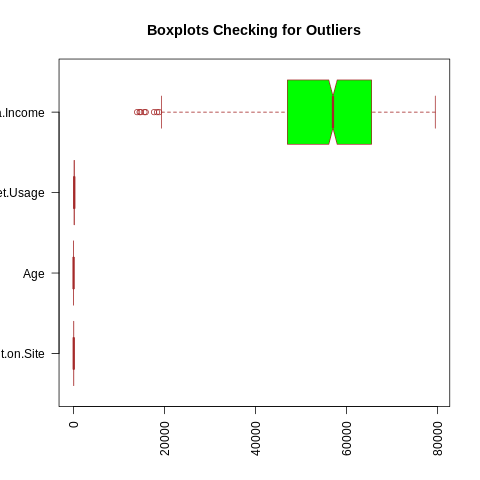

In [17]:
%%R
#checking for outliers using box plots on numerical variables
Daily.Time.Spent.on.Site <- ads$Daily.Time.Spent.on.Site
Age <- ads$Age
Daily.Internet.Usage <- ads$Daily.Internet.Usage
Area.Income <- ads$Area.Income
boxplot(Daily.Time.Spent.on.Site,Age, Daily.Internet.Usage,Area.Income,
        main = "Boxplots Checking for Outliers",
        at = c(1,2,3,4),
        names = c("Daily.Time.Spent.on.Site", "Age","Daily.Internet.Usage","Area.Income"),
        las = 2,
        col = c("orange","red","blue","green"),
        border = "brown",
        horizontal = TRUE,
        notch = TRUE
)
#from the resulting plots there are outliers in the Area Income Variables. 
#Age, Daily Internet Usage, and Daily Time spent on site have no outliers.

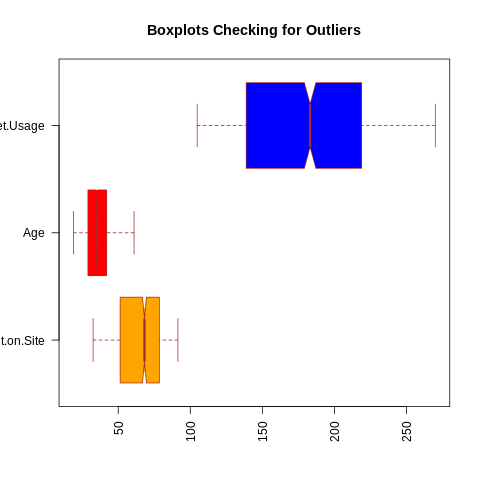

In [18]:
%%R
#plot showing no outliers from the other numerical variables
Daily.Time.Spent.on.Site <- ads$Daily.Time.Spent.on.Site
Age <- ads$Age
Daily.Internet.Usage <- ads$Daily.Internet.Usage
boxplot(Daily.Time.Spent.on.Site,Age, Daily.Internet.Usage,
        main = "Boxplots Checking for Outliers",
        at = c(1,2,3),
        names = c("Daily.Time.Spent.on.Site", "Age","Daily.Internet.Usage"),
        las = 2,
        col = c("orange","red","blue"),
        border = "brown",
        horizontal = TRUE,
        notch = TRUE
)
#from the resulting plots there are no outliers

In [19]:
%%R
## 3. Univariate And Bivariate Analysis



# Distribution of individuals who clicked and did not click on ads
table(ads$`Clicked.on.Ad`)
#500 people clicked on ads(1) and 500 people did not click on ads(0). #There is no class imbalance


  0   1 
500 500 


In [20]:
%%R
# frequency table of countries where individuals clicked on ads
country_freq <- sort(table(ads[ads$`Clicked.on.Ad`==1,]$Country), decreasing = T)%>% as.data.frame() 
country_freq[country_freq$Freq > 2,]
#from the distribution table, Australia, Ethiopia and Turkey (7) had the mot individuals clicking on ads.

                               Var1 Freq
1                         Australia    7
2                          Ethiopia    7
3                            Turkey    7
4                           Liberia    6
5                     Liechtenstein    6
6                      South Africa    6
7                       Afghanistan    5
8                            France    5
9                           Hungary    5
10                          Mayotte    5
11                             Peru    5
12                          Senegal    5
13                          Albania    4
14              Antigua and Barbuda    4
15                          Bahamas    4
16                         Bulgaria    4
17                            China    4
18                 Christmas Island    4
19                             Cuba    4
20                           Cyprus    4
21                   Czech Republic    4
22                      El Salvador    4
23                        Hong Kong    4
24              

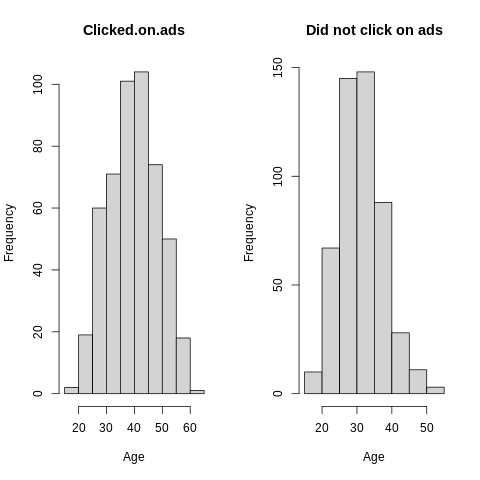

In [21]:
%%R
# Age distribution
par(mfrow=c(1, 2))
hist(ads[ads$`Clicked.on.Ad` == 1,]$Age, xlab = 'Age', main = 'Clicked.on.ads' )
hist(ads[ads$`Clicked.on.Ad` == 0,]$Age, xlab = 'Age', main = 'Did not click on ads' )
#those between ages 40 to 45 were the majority who clicked on ads. again, those who did not click on ads are between ages 30 to 35.

In [22]:
%%R
#Gender Distribution
gender <- subset(ads, select = c("Male", "Clicked.on.Ad"))
gender %>% group_by(Male,`Clicked.on.Ad`)%>% summarise(sum_of_individuals = n())
#250 males(1) did not click on ads and 231 males clicked on ads. 
#On the other hand, 250 females(class 0) did not click on ads while 269 females clicked on the ads.

`summarise()` has grouped output by 'Male'. You can override using the
`.groups` argument.
# A tibble: 4 × 3
# Groups:   Male [2]
   Male Clicked.on.Ad sum_of_individuals
  <int>         <int>              <int>
1     0             0                250
2     0             1                269
3     1             0                250
4     1             1                231


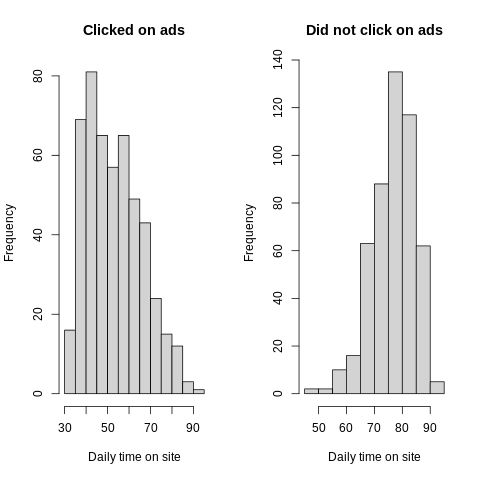

In [23]:
%%R
#Time spent on site distribution
par(mfrow=c(1, 2))
hist(ads[ads$`Clicked.on.Ad` == 1,]$`Daily.Time.Spent.on.Site`, xlab = 'Daily time on site', main = 'Clicked on ads' )
hist(ads[ads$`Clicked.on.Ad` == 0,]$`Daily.Time.Spent.on.Site`, xlab = 'Daily time on site', main = 'Did not click on ads' )
#most of those who clicked on ads spent about 40 to 45 minutes on the site, while those who did not click on ads had about 80 to 85 minutes which is longer timeframe.

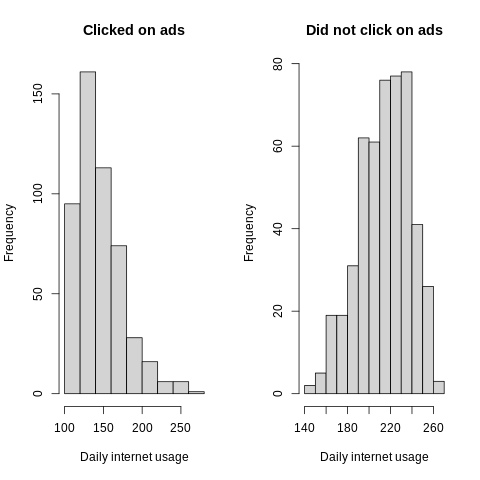

In [24]:
%%R
#Daily Internet Usage Distribution
par(mfrow=c(1, 2))
hist(ads[ads$`Clicked.on.Ad` == 1,]$`Daily.Internet.Usage`, xlab = 'Daily internet usage', main = 'Clicked on ads' )
hist(ads[ads$`Clicked.on.Ad` == 0,]$`Daily.Internet.Usage`, xlab = 'Daily internet usage', main = 'Did not click on ads' )
#People with daily internet usage between 100 to 150 clicked on ads wile those with daily internet sage between 220 to 240 did not.

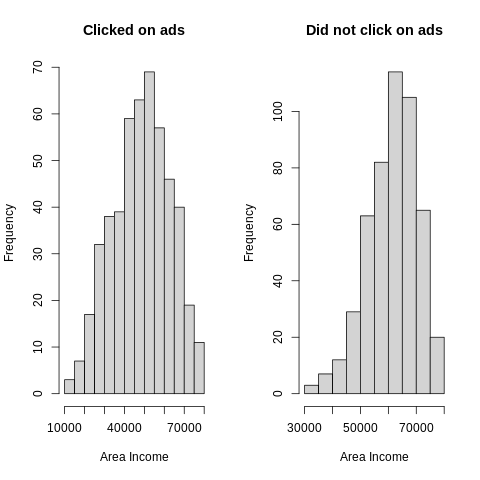

In [25]:
%%R
#Area Income Distribution
par(mfrow=c(1, 2))
hist(ads[ads$`Clicked.on.Ad` == 1,]$`Area.Income`,xlab = 'Area Income', main = 'Clicked on ads' )
hist(ads[ads$`Clicked.on.Ad` == 0,]$`Area.Income`, xlab = 'Area Income', main = 'Did not click on ads' )
#Those with an Area Income of between 50000 to 550000 clicked on ads, while those with an Area income of between 60000 to 65000 did not.

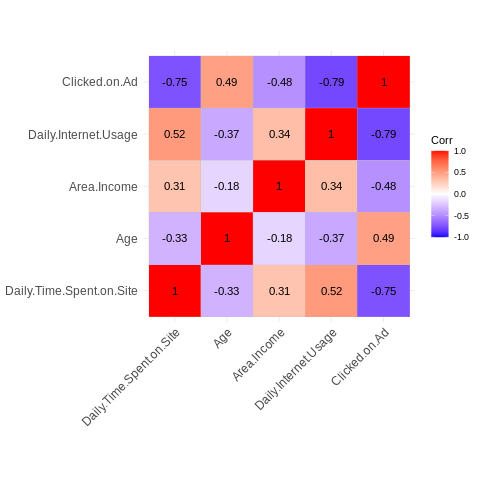

In [26]:
%%R
##Correlation between numerical variables and Clicked on Ads



#Plotting Heat Map Showing Correlation between Numerical Variable with the target variable(Clicked on Ads)
num_var <- ads %>%
  select_if(is.numeric) %>%
  select(Daily.Time.Spent.on.Site, Age, Area.Income,Daily.Internet.Usage,Clicked.on.Ad)
# Calculate the correlations
corr <- cor(num_var, use = "complete.obs")
ggcorrplot(round(corr, 2), 
           type = "full", lab = T)
#Age, had a positive correlation with ads clicked on the site. 
#Daily Internet Usage, Area Income, and Daily Time Spent on Site had negative correlation with Clicked on Ad.

In [34]:
#Modeling


%%R
# Applying the lm() function before modelling
m_lm <- lm(Clicked.on.Ad ~ ., ads)

In [35]:
%%R
# Generating the anova table
anova(m_lm)

Analysis of Variance Table

Response: Clicked.on.Ad
                          Df  Sum Sq Mean Sq F value Pr(>F)
Daily.Time.Spent.on.Site   1 139.920 139.920     NaN    NaN
Age                        1  16.793  16.793     NaN    NaN
Area.Income                1  13.721  13.721     NaN    NaN
Daily.Internet.Usage       1  35.372  35.372     NaN    NaN
Ad.Topic.Line            995  44.195   0.044     NaN    NaN
Residuals                  0   0.000     NaN               


In [40]:
%%R
# Then performing our prediction and print results
pred <- predict(m_lm, ads)

In [41]:
%%R
# Cross Validation 
set.seed(42)
m_lm2 <- train(Clicked.on.Ad ~ ., ads,
                      method = "lm", 
                      trControl = trainControl(method = "cv", 
                                               number = 10, 
                                               verboseIter = FALSE))
summary(m_lm2)
m_lm2

Linear Regression 

1000 samples
   9 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 900, 900, 900, 900, 900, 900, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.5698044  0.5450902  0.4311246

Tuning parameter 'intercept' was held constant at a value of TRUE


In [42]:
%%R
# Once we have trained our model, we can directly use this train object as input to the predict method:
pred2 <- predict(m_lm2, ads)
error <- pred2 - diamonds$price
rmse_xval <- sqrt(mean(error^2)) ## xval RMSE
rmse_xval
# RMSE OF 5601.632. A high RMSE shows low accuracy

[1] 5601.632


In [48]:
%%R
#SVM
# Split data into train and test sets
input_data <- createDataPartition(y = ads$Area.Income, p= 0.7, list = FALSE)
training <- ads[input_data,]
testing <- ads[-input_data,]


In [49]:
%%R
#Check the train data
dim(training)

[1] 700  10


In [50]:
%%R
#check the testing ssplit
dim(testing)

[1] 300  10


In [54]:
%%R
training[["Clicked.on.Ad"]] = factor(training[["Clicked.on.Ad"]])

In [55]:
%%R
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
svm_Linear <- train(Area.Income ~., data = training, method = "svmLinear", 
                    trControl=trctrl, 
                    preProcess = c("center", "scale"), 
                    tuneLength = 10)

1 package is needed and is not installed. (kernlab). Would you like to try to install it now?
1: yes
2: no

Selection: 1


(as ‘lib’ is unspecified)







	‘/tmp/RtmpUQjUJz/downloaded_packages’

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 



In [56]:
%%R
#check te results rom the training model

svm_Linear

#The model peromed much worse with an RMSE o 13183.4

Support Vector Machines with Linear Kernel 

700 samples
  9 predictor

Pre-processing: centered (2315), scaled (2315) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 630, 629, 629, 628, 631, 631, ... 
Resampling results:

  RMSE     Rsquared    MAE     
  13183.4  0.09698177  10402.51

Tuning parameter 'C' was held constant at a value of 1


## 4. Conclusion and REcomendations
To increase ad clicking, the blog owner should target people who are:
  1.  located in : Australia,Ethiopia,Turkey,Liberia,Liechtenstein,South Africa,Afghanistan,France,Hungary,
  2. Females. 269 Females from the data set clicked on Ads
  3. the ads should target those between ages 35 and 45 also, we noted that Age is a key factor from the correlation heatmap.
  4. who spend 40 to 50 minutes daily on the site
  5. Those who have an area income of between 45000 to 55000
  6. Uses the internet for at least 100 to 150 minutes daily

when the blog owner is able to tailor her cryptography course blog using proper AI tools like SurferSEO for ranking purposes to meet those measures she is more likely to have more people clicking on ads.
